In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 🔹 PHASE 1: Understand the Target (Churn)
### 1️⃣ Target distribution

What percentage of customers have churned vs stayed?

Is the dataset balanced or imbalanced?

Should accuracy alone be trusted later for modeling?

👉 (This tells you what evaluation metrics you’ll need later)



<Axes: xlabel='Churn', ylabel='count'>

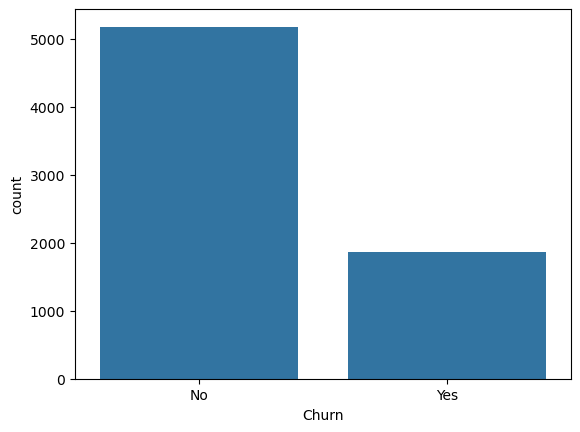

In [4]:
# plotting countplot to get churn distribution

sns.countplot(data=df, x='Churn')

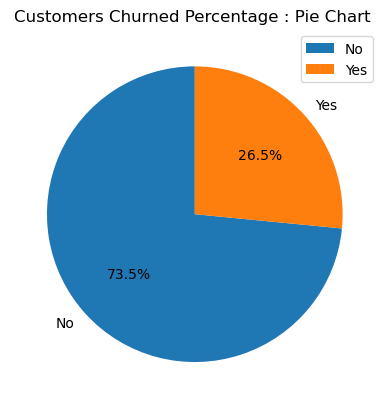

In [5]:
plt.pie(df['Churn'].value_counts(),labels = ['No','Yes'],autopct='%1.1f%%',startangle=90)
plt.legend()
plt.title('Customers Churned Percentage : Pie Chart ')
plt.show()


## 🔹 PHASE 2: Customer Demographics vs Churn
### 2️⃣ Gender & churn

Do males or females churn more?

Is gender even a meaningful predictor?

### 3️⃣ Senior citizens

Do senior citizens churn more than non-seniors?

Is being a senior citizen strongly associated with churn?

### 4️⃣ Family status

Do customers with partners churn less?

Do customers with dependents churn less?

Which group is the most loyal?

👉 These answer who is more likely to leave.


In [6]:
# Do males or females churn more?

grp1 = df.groupby(['gender'])['Churn'].value_counts()
grp1

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

In [7]:
grp1 = grp1.reset_index(name='Count')
grp1

,gender,Churn,Count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


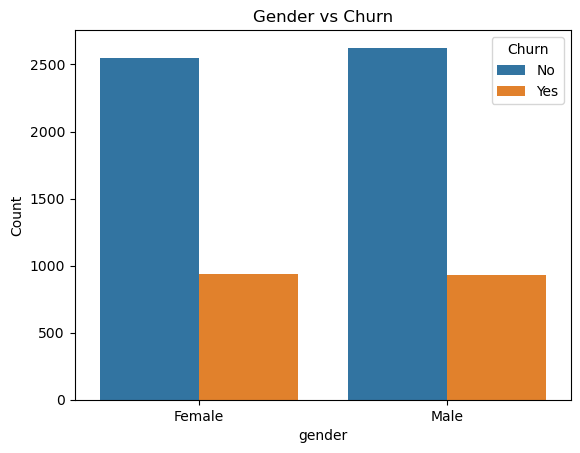

In [8]:
sns.barplot(data = grp1, x='gender', y='Count', hue='Churn')
plt.title('Gender vs Churn')
plt.show()

In [9]:
# Rate of gender vs churn, we do this...

churn_pct = (
    df.groupby('gender')['Churn']
      .value_counts(normalize=True)  # count / total --> proportion
      .mul(100)                      # proportion * 100 = percentage
      .reset_index(name='Percentage')
)
churn_pct

,gender,Churn,Percentage
0,Female,No,73.079128
1,Female,Yes,26.920872
2,Male,No,73.839662
3,Male,Yes,26.160338


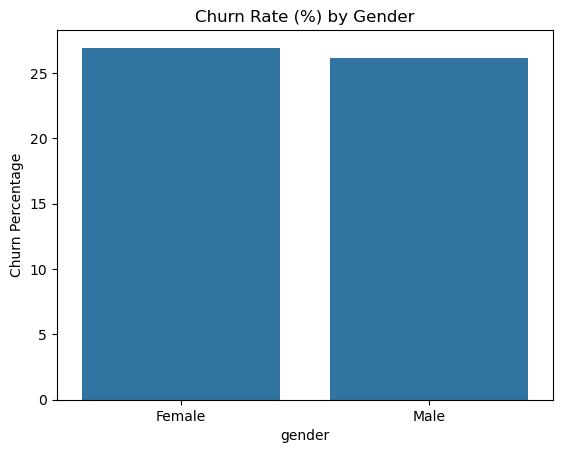

In [10]:
churn_pct_yes = churn_pct[churn_pct['Churn'] == 'Yes']

sns.barplot(
    data=churn_pct_yes,
    x='gender',
    y='Percentage'
)

plt.title('Churn Rate (%) by Gender')
plt.ylabel('Churn Percentage')
plt.show()


## 🔹 PHASE 3: Tenure & Charges (VERY IMPORTANT)
### 5️⃣ Tenure analysis

Do customers with low tenure churn more?

At what tenure range is churn the highest?

Are long-term customers loyal?

### 6️⃣ Monthly charges

Do customers with higher monthly charges churn more?

Is churn higher for low-cost or high-cost plans?

### 7️⃣ Total charges

How does total spending differ between churned vs retained customers?

Are high-value customers leaving?

👉 These explain customer lifetime behavior.


In [11]:
pd.set_option('display.max_columns',None) # this gets non-truncated head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# we clean Churn col to numeric for sake of EDA
# 1 --> yes
# 0 --> no

df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### 5️⃣ Tenure analysis
Do customers with low tenure churn more?


In [13]:
# as we have tenure for each observation, we have to create bins for taking low/high tenure obs.
# Tenure = no. of Months customer has been wwith company
df['tenure'].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [14]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-1yr','1-2yr','2-3yr','3-4yr','4-5yr','5-6yr']

df['tenure_group'] = pd.cut(df['tenure'],bins = bins, labels=labels)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,2-3yr
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1yr
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4yr
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1yr


we got tenure groups, now we can see if low/high tenure customers do churn or not

In [15]:
# this gives no. of churned customer in each tenure group...but not total count in each group

df.groupby(['tenure_group'])['Churn'].sum()

C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\1032677520.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['tenure_group'])['Churn'].sum()


tenure_group
0-1yr    1037
1-2yr     294
2-3yr     180
3-4yr     145
4-5yr     120
5-6yr      93
Name: Churn, dtype: int64

In [16]:
# as we need rate, we do (no. of churned customer / total customer)
# so we use .mean which does exactly same thing

churn_rate = df.groupby(['tenure_group'])['Churn'].mean().mul(100)
churn_rate

C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\358792185.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(['tenure_group'])['Churn'].mean().mul(100)


tenure_group
0-1yr    47.678161
1-2yr    28.710938
2-3yr    21.634615
3-4yr    19.028871
4-5yr    14.423077
5-6yr     6.609808
Name: Churn, dtype: float64

In [17]:
churn_rate_df = churn_rate.reset_index(name='Churn_Perc')
churn_rate_df

,tenure_group,Churn_Perc
0,0-1yr,47.678161
1,1-2yr,28.710938
2,2-3yr,21.634615
3,3-4yr,19.028871
4,4-5yr,14.423077
5,5-6yr,6.609808


<Axes: xlabel='tenure_group', ylabel='Churn_Perc'>

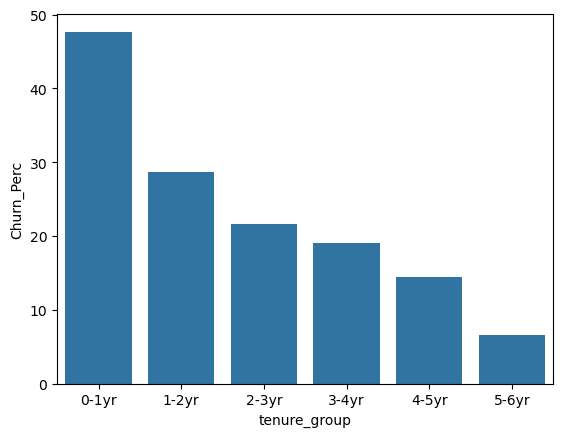

In [18]:
sns.barplot(data=churn_rate_df, x='tenure_group', y='Churn_Perc')

#### Do customers with low tenure churn more?

Yes as you can see in above given bar Plot

#### Are long-term customers loyal?

Yes as it seems 

#### At what tenure range is churn the highest?

In [19]:
print('Tenure Range with Highest Churn Rate is:',churn_rate_df['tenure_group'][churn_rate_df['Churn_Perc'].idxmax()], 'With Rate of:',churn_rate_df['Churn_Perc'].max())

Tenure Range with Highest Churn Rate is: 0-1yr With Rate of: 47.67816091954023


#### 6️⃣ Monthly charges
#### Do customers with higher monthly charges churn more?

In [20]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [21]:
bins = [0, 50, 80 , df['MonthlyCharges'].max()]
labels = ['low','medium','high']

df['monthcharge_group'] = pd.cut(df['MonthlyCharges'], bins =bins, labels =labels)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,2-3yr,medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1yr,medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4yr,low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1yr,medium


In [22]:
grp3 = df.groupby(['monthcharge_group'])['Churn'].mean().mul(100).reset_index(name='churn_rate')
grp3

C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\3096372986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp3 = df.groupby(['monthcharge_group'])['Churn'].mean().mul(100).reset_index(name='churn_rate')


,monthcharge_group,churn_rate
0,low,15.702479
1,medium,28.970164
2,high,33.983496


<Axes: xlabel='monthcharge_group', ylabel='churn_rate'>

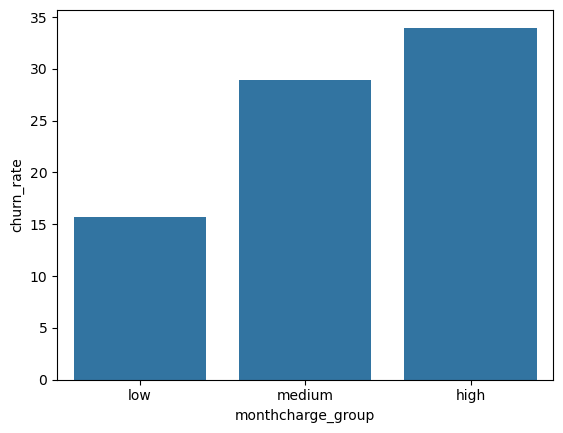

In [23]:
sns.barplot(data=grp3, x='monthcharge_group',y='churn_rate')

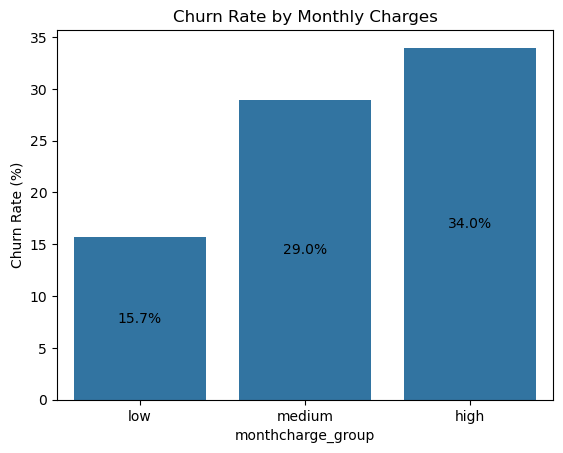

In [24]:
## Chatgpt's code for visualization*
ax = sns.barplot(data=grp3, x='monthcharge_group',y='churn_rate')
plt.title('Churn Rate by Monthly Charges')
plt.ylabel('Churn Rate (%)')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

#### Do customers with higher monthly charges churn more?

Yes according to above barplot

#### Is churn higher for low-cost or high-cost plans?
Churn is high for high-cost plans as it has 34% of churn rate

### 7️⃣ Total charges
#### How does total spending differ between churned vs retained customers?


In [25]:
# 1st we convert str to num for calculation

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [26]:
df = df.dropna(subset=['TotalCharges'])

In [27]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [28]:
# we do quartile binning this time...
# .qcut() - Quantile-based discretization function.
# equal-sized buckets based on rank or based on sample quantiles. 

df['totalcharge_grp'] = pd.qcut(df['TotalCharges'], q=4,labels=['low','medium','high','veryhigh'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3yr,medium,high
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1yr,medium,low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4yr,low,high
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1yr,medium,low


In [29]:
# How does total spending differ between churned vs retained customers?

grp4 = df.groupby(['totalcharge_grp'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp4

C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\86413886.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp4 = df.groupby(['totalcharge_grp'])['Churn'].mean().mul(100).reset_index(name='churnrate')


,totalcharge_grp,churnrate
0,low,43.458476
1,medium,25.312856
2,high,23.037543
3,veryhigh,14.505119


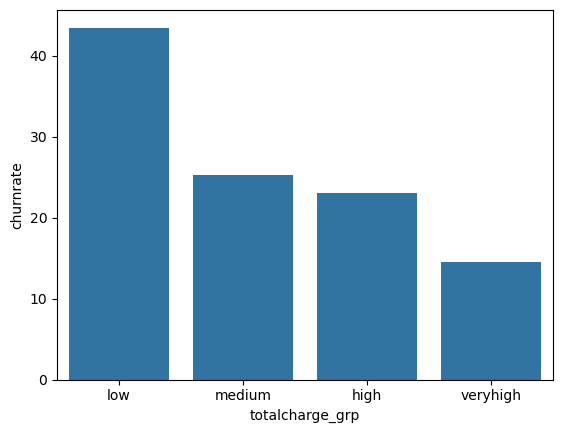

In [30]:
sns.barplot(data=grp4, x='totalcharge_grp',y='churnrate')
plt.show()

#### How does total spending differ between churned vs retained customers?

Low total spending has more churn rate, and high spending has more retained customers

#### Are high-value customers leaving?

No, high value customers are more retained than low value as per above barplot

## 🔹 PHASE 4: Services vs Churn (BIG GOLDMINE)
### 8️⃣ Phone & internet services

Do customers without phone service churn more?

Which internet service type has the highest churn?

DSL

Fiber optic

No internet

### 9️⃣ Security & support services

Does lack of online security increase churn?

Do customers without tech support churn more?

Which add-on service reduces churn the most?

### 10) Entertainment services

Do streaming services impact churn?

Is churn higher for customers without entertainment add-ons?

👉 These tell you what features matter most.


### 8️⃣ Phone & internet services
#### Do customers without phone service churn more?

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3yr,medium,high
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1yr,medium,low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4yr,low,high
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1yr,medium,low


In [32]:
grp5 = df.groupby(['PhoneService'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp5

,PhoneService,churnrate
0,No,25.000000
1,Yes,26.747481


<Axes: xlabel='PhoneService', ylabel='churnrate'>

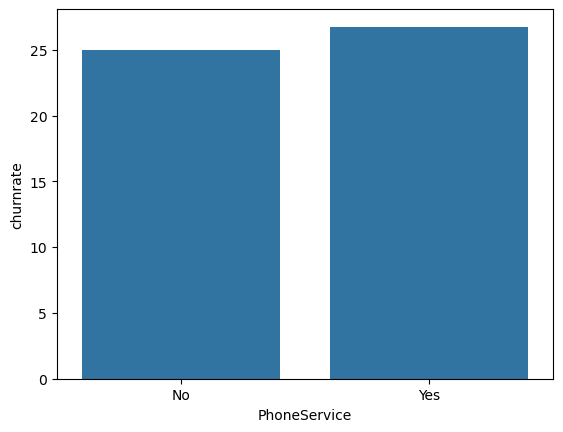

In [33]:
sns.barplot(data=grp5, x='PhoneService',y='churnrate')

#### Do customers without phone service churn more?
Yes , but not significantly


#### Which internet service type has the highest churn?

DSL

Fiber optic

No internet

In [34]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [35]:
grp6 = df.groupby(['InternetService'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp6

,InternetService,churnrate
0,DSL,18.998344
1,Fiber optic,41.892765
2,No,7.434211


<Axes: xlabel='InternetService', ylabel='churnrate'>

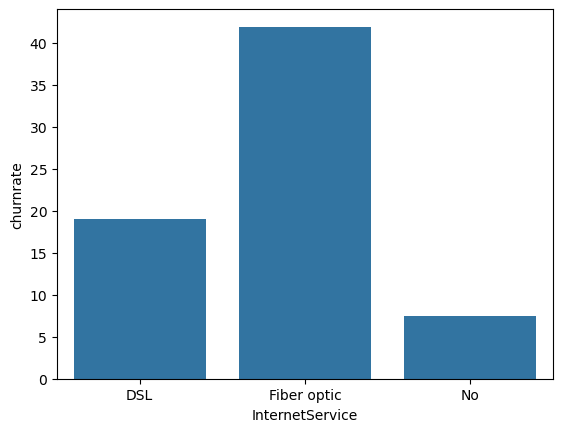

In [36]:
sns.barplot(data=grp6,x='InternetService',y='churnrate')

#### Which internet service type has the highest churn?

as per plot above, Fiber optic has highest churn rate...

#### 9️⃣ Security & support services
##### Does lack of online security increase churn?

In [37]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [38]:
# have to exlclude 'No internet service' from OnlineSecurity col
# so create a new df

df1 = df[df['OnlineSecurity'] != 'No internet service']
df1['OnlineSecurity'].value_counts()

OnlineSecurity
No     3497
Yes    2015
Name: count, dtype: int64

In [39]:
grp7 = df1.groupby(['OnlineSecurity'])['Churn'].mean().mul(100).reset_index(name='churn_rate')
grp7

,OnlineSecurity,churn_rate
0,No,41.778667
1,Yes,14.640199


<Axes: xlabel='OnlineSecurity', ylabel='churn_rate'>

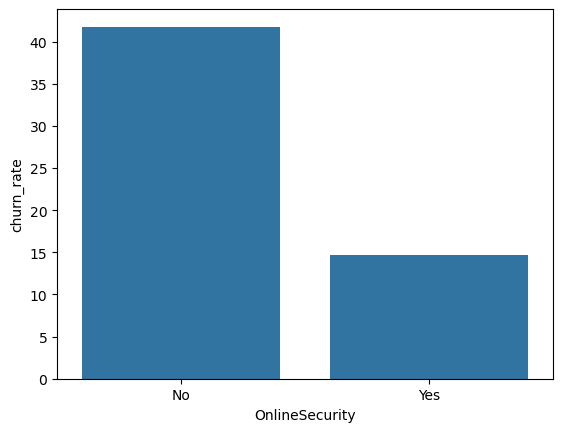

In [40]:
sns.barplot(data=grp7,x='OnlineSecurity',y='churn_rate')

#### Does lack of online security increase churn?
yes it increases churn rate

#### Do customers without tech support churn more?

In [41]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low,low


In [42]:
df1 = df[df['TechSupport'] != 'No internet service']
df1['TechSupport'].value_counts()

TechSupport
No     3472
Yes    2040
Name: count, dtype: int64

In [43]:
grp8 = df1.groupby(['TechSupport'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp8

,TechSupport,churnrate
0,No,41.647465
1,Yes,15.196078


<Axes: xlabel='TechSupport', ylabel='churnrate'>

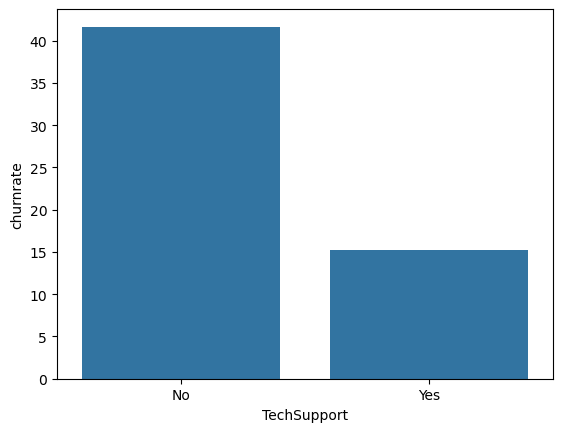

In [44]:
sns.barplot(data=grp8, x='TechSupport',y='churnrate')

#### Do customers without tech support churn more?
Yes

#### Which add-on service reduces churn the most?

In [45]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low,low


In [46]:
# these are add-on services ...
# InternetService	OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV

columns = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV']

result = []

for col in columns :
    temp_df = df[df[col] != 'No internet service']
    churn_rate = temp_df.groupby([col])['Churn'].mean().mul(100)

    churn_drop = churn_rate['No'] - churn_rate['Yes']  # diff between rates so we actually see impact of that perticular add-on for churn drop

    result.append({
        'Addon': col,
        'Churn_No': churn_rate['No'],
        'Churn_Yes': churn_rate['Yes'],
        'Churn_Drop': churn_drop
    })
addon_effect = pd.DataFrame(result).sort_values('Churn_Drop',ascending=False)
addon_effect

,Addon,Churn_No,Churn_Yes,Churn_Drop
0,OnlineSecurity,41.778667,14.640199,27.138469
3,TechSupport,41.647465,15.196078,26.451387
1,OnlineBackup,39.941691,21.567010,18.374681
2,DeviceProtection,39.140271,22.539289,16.600983
4,StreamingTV,33.535066,30.114687,3.420378


#### Which add-on service reduces churn the most?
OnlineSecurity	reduces churn mostly as its churn drop rate is 27%

### 10) Entertainment services
#### Do streaming services impact churn?


In [47]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low,low


In [48]:
columns=['StreamingTV','StreamingMovies']

for col in columns:
    
  df2 = df[df[col] != 'No internet service']
df2['StreamingTV'].value_counts()

StreamingTV
No     2809
Yes    2703
Name: count, dtype: int64

In [49]:
grp9 = df2.groupby(['StreamingTV','StreamingMovies'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp9

,StreamingTV,StreamingMovies,churnrate
0,No,No,34.457115
1,No,Yes,31.186869
2,Yes,No,31.806283
3,Yes,Yes,29.448169


<Axes: xlabel='StreamingTV', ylabel='churnrate'>

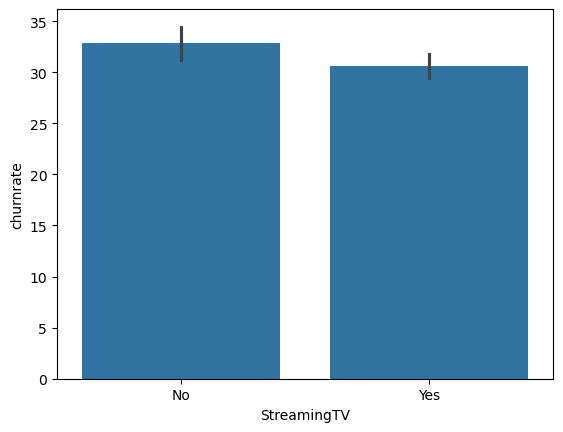

In [50]:
sns.barplot(data=grp9, x='StreamingTV', y='churnrate')

<Axes: xlabel='StreamingMovies', ylabel='churnrate'>

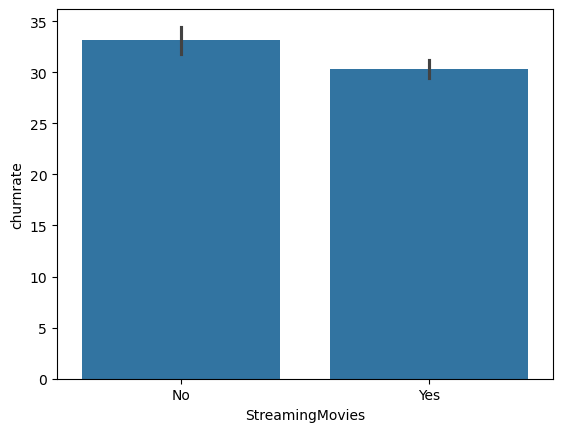

In [51]:
sns.barplot(data=grp9, x='StreamingMovies', y='churnrate')

#### Do streaming services impact churn?

not significant;y as diff between having them and not having them is merely 2-3% , i would say No Impact

#### Is churn higher for customers without entertainment add-ons?

Yes 

## 🔹 PHASE 5: Contract & Billing (TOP CHURN DRIVERS)
### 11) Contract type

Which contract type has the highest churn?

Are month-to-month customers the most risky?

Do long-term contracts reduce churn significantly?

### 12) Billing & payment

Does paperless billing increase churn?

Which payment method has the highest churn?

Are electronic check users more likely to churn?

👉 These are classic real-world churn drivers.

In [52]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low,low


#### 11) Contract type
##### Which contract type has the highest churn?

In [53]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [54]:
grp10 = df.groupby(['Contract'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp10

,Contract,churnrate
0,Month-to-month,42.709677
1,One year,11.277174
2,Two year,2.848665


<Axes: xlabel='Contract', ylabel='churnrate'>

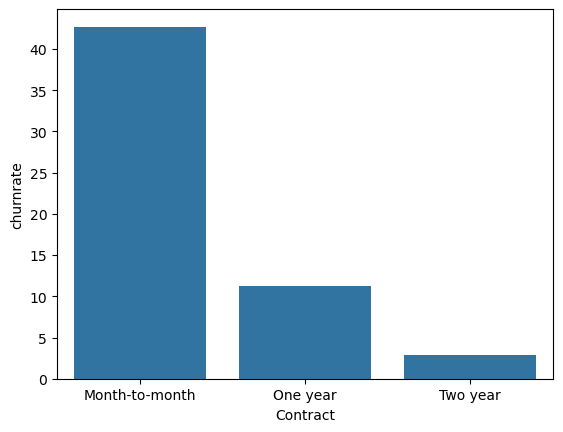

In [55]:
sns.barplot(data=grp10,x='Contract',y='churnrate')

#### Which contract type has the highest churn?
Month-to-month ,according to above barplot

#### Are month-to-month customers the most risky?
Yes as they have 42% of churn rate

#### Do long-term contracts reduce churn significantly?
Yes according to plot

### 12) Billing & payment
#### Does paperless billing increase churn?

In [56]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

In [57]:
grp11 = df.groupby(['PaperlessBilling'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp11

,PaperlessBilling,churnrate
0,No,16.375698
1,Yes,33.589251


<Axes: xlabel='PaperlessBilling', ylabel='churnrate'>

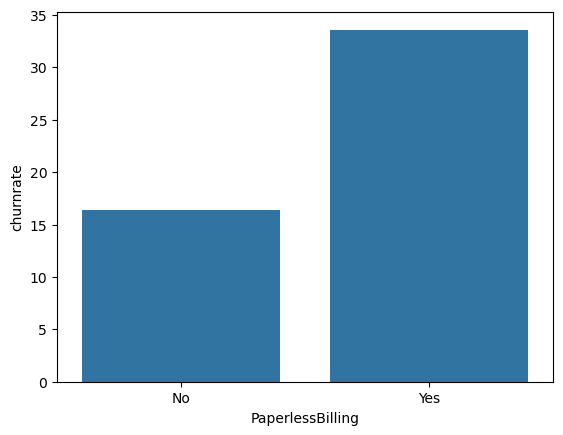

In [58]:
sns.barplot(data=grp11, x='PaperlessBilling',y='churnrate')

#### Does paperless billing increase churn?
Yes, according to plot above

#### Which payment method has the highest churn?


In [59]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [60]:
grp12 = df.groupby(['PaymentMethod'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp12

,PaymentMethod,churnrate
0,Bank transfer (automatic),16.731518
1,Credit card (automatic),15.253123
2,Electronic check,45.285412
3,Mailed check,19.201995


([0, 1, 2, 3],
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

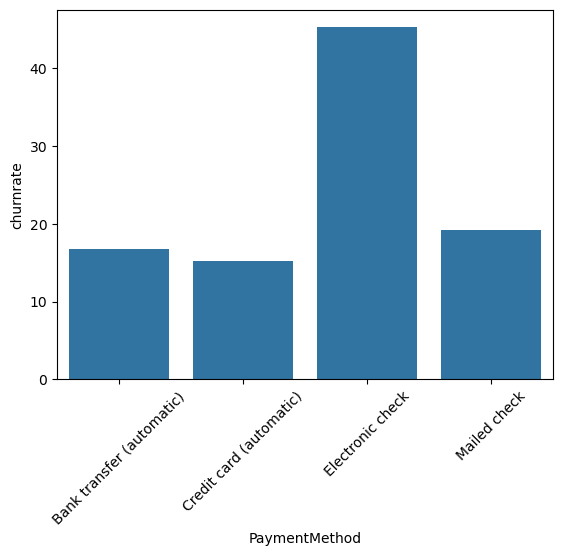

In [61]:
sns.barplot(data=grp12, x='PaymentMethod',y='churnrate')
plt.xticks(rotation=45)

#### Which payment method has the highest churn?
Electronic Check has highes churn rate

#### Are electronic check users more likely to churn?
Yes

## 🔹 PHASE 6: Combined / Advanced EDA
### 13) Multi-feature insights

Do high-charge + month-to-month customers churn the most?

Do senior citizens on fiber optic churn more?

Which combination of features creates the highest churn risk?

### 14) Correlation & patterns

Which numeric features correlate most with churn?

Is tenure negatively correlated with churn?


### 13) Multi-feature insights
#### Do high-charge + month-to-month customers churn the most?

In [62]:
# for high charge we will consider 'totalcharge_grp' < 'high','veryhigh'for now*
# for month-to-month is in 'Contract'

df['totalcharge_grp'].value_counts()

totalcharge_grp
low         1758
medium      1758
high        1758
veryhigh    1758
Name: count, dtype: int64

In [63]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [64]:
# here we have to compare both contract and charges with churn

grp13 = df.groupby(['totalcharge_grp','Contract'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp13

C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\2578451849.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp13 = df.groupby(['totalcharge_grp','Contract'])['Churn'].mean().mul(100).reset_index(name='churnrate')


,totalcharge_grp,Contract,churnrate
0,low,Month-to-month,49.347258
1,low,One year,5.755396
2,low,Two year,0.000000
3,medium,Month-to-month,41.658440
4,medium,One year,5.217391
5,medium,Two year,1.250000
6,high,Month-to-month,37.179487
7,high,One year,11.685393
8,high,Two year,1.326260
9,veryhigh,Month-to-month,32.741117


<Axes: xlabel='totalcharge_grp', ylabel='churnrate'>

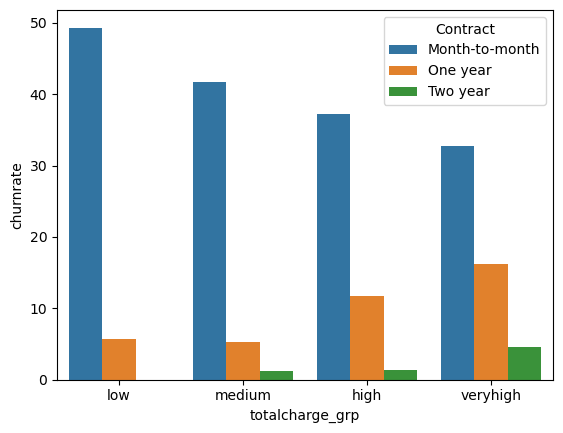

In [65]:
sns.barplot(data=grp13, x='totalcharge_grp', y ='churnrate', hue='Contract')

#### Do high-charge + month-to-month customers churn the most?

No. High-charge month-to-month customers do not churn the most.

actually lower total charge + month-to-month has more churn

#### Do senior citizens on fiber optic churn more?

In [66]:
ndf = df[df['InternetService'] == 'Fiber optic' ]

ndf['InternetService'].value_counts()

InternetService
Fiber optic    3096
Name: count, dtype: int64

In [67]:
ndf.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1,0-1yr,medium,low


In [68]:
grp14 = ndf.groupby(['SeniorCitizen','InternetService'])['Churn'].mean().mul(100).reset_index(name='churnrate')
grp14

,SeniorCitizen,InternetService,churnrate
0,0,Fiber optic,39.911700
1,1,Fiber optic,47.292419


<Axes: xlabel='SeniorCitizen', ylabel='churnrate'>

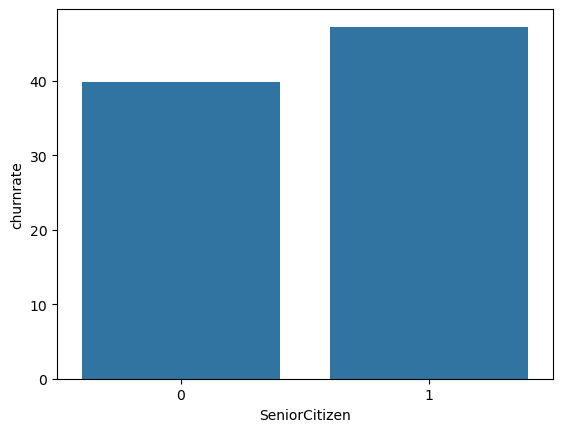

In [69]:
sns.barplot(data=grp14, x='SeniorCitizen', y='churnrate')

#### Do senior citizens on fiber optic churn more?
Yes according to above plot..
but not much significant difference in churn rate

### Which combination of features creates the highest churn risk?

FOR THIS I'LL HAVE TO CHECK ALL FEATURE I HAVE COMPARED BEFORE AND SELECT ONES WITH HIGHES CHURN RATE...

highest churn rates i got are in:

tenure_group -> 0-1yr ,

totalcharge_grp -> low, 

InternetService -> Fiber optic ,

OnlineSecurity -> No ,

TechSupport -> No , 

Contract -> month-to-month , 

total_charge -> low + month-to-month 

#### Not going further to check each combinations as i don't aim to be a data analyst... Work done above is enough for ML eng.

### 14) Correlation & patterns
#### Which numeric features correlate most with churn?

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1yr,low,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3yr,medium,high
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1yr,medium,low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4yr,low,high
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1yr,medium,low


In [71]:
cor = df.corr(numeric_only=True)
cor

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


<Axes: >

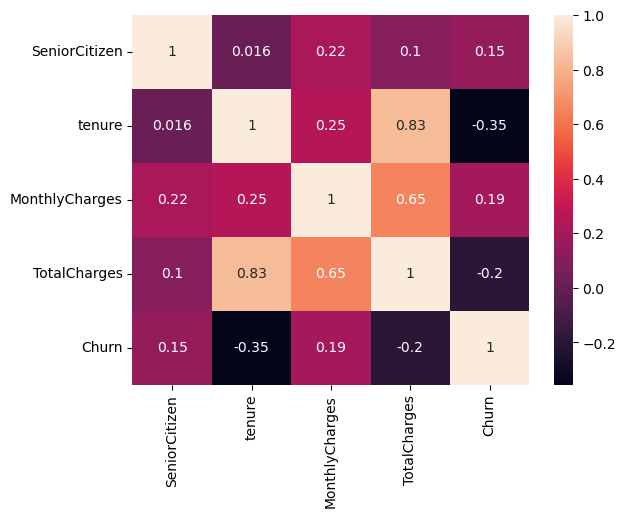

In [72]:
sns.heatmap(data = cor, annot=True)

#### Which numeric features correlate most with churn?
Tenure and MonthlyCharges features mostly correlate with Churn

#### Is tenure negatively correlated with churn?
Yes

## 🔹 PHASE 7: Data Quality Checks (Before Modeling)
### 15) Data issues

Why is TotalCharges an object instead of numeric?

Are there hidden missing or blank values?

Do any categories dominate too much?


#### Why is TotalCharges an object instead of numeric?

As there's possible if its unknown or a symbol input is there like $, but before going furthur i cleaned the data and converted object(str) to numeric(float)

In [73]:
df.info() # u can see its now float64

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   gender             7032 non-null   object  
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   object  
 4   Dependents         7032 non-null   object  
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   object  
 7   MultipleLines      7032 non-null   object  
 8   InternetService    7032 non-null   object  
 9   OnlineSecurity     7032 non-null   object  
 10  OnlineBackup       7032 non-null   object  
 11  DeviceProtection   7032 non-null   object  
 12  TechSupport        7032 non-null   object  
 13  StreamingTV        7032 non-null   object  
 14  StreamingMovies    7032 non-null   object  
 15  Contract           7032 non-null   object  
 16  PaperlessBi

#### Are there hidden missing or blank values?

Original dataset after converting total charges to numric did have null values

so i droped those rows dataset has no null values or missing dara points


In [74]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
tenure_group         0
monthcharge_group    0
totalcharge_grp      0
dtype: int64

## 🔹 PHASE 8: Preprocessing Readiness (Next Step)
### 16) Encoding & scaling decisions

Which columns need label encoding?

Which columns need one-hot encoding?

Which features need scaling and why?

Should customerID be dropped?

### ABOVE GIVEN QUESTIONS WILL BE HANDLED LATER , FOR NOW I DO FEATURE SELECTION FROM EDA I DID

from EDA i got

highest churn rates i got are in:

tenure_group -> 0-1yr ,

totalcharge_grp -> low, 

InternetService -> Fiber optic ,

OnlineSecurity -> No ,

TechSupport -> No , 

Contract -> month-to-month , 

total_charge -> low + month-to-month 

and from heatmap i got:

Tenure and MonthlyCharges

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   gender             7032 non-null   object  
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   object  
 4   Dependents         7032 non-null   object  
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   object  
 7   MultipleLines      7032 non-null   object  
 8   InternetService    7032 non-null   object  
 9   OnlineSecurity     7032 non-null   object  
 10  OnlineBackup       7032 non-null   object  
 11  DeviceProtection   7032 non-null   object  
 12  TechSupport        7032 non-null   object  
 13  StreamingTV        7032 non-null   object  
 14  StreamingMovies    7032 non-null   object  
 15  Contract           7032 non-null   object  
 16  PaperlessBi

to be considered as features:


tenure

TotalCharges

MonthlyCharges

Dependents

InternetService

OnlineSecurity

TechSupport

Contract

PaperlessBilling

PaymentMethod

In [76]:
X = df[['tenure','TotalCharges','MonthlyCharges','Dependents','InternetService','OnlineSecurity','TechSupport','Contract','PaperlessBilling','PaymentMethod']]
X.head()

,tenure,TotalCharges,MonthlyCharges,Dependents,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,No,DSL,No,No,Month-to-month,Yes,Electronic check
1,34,1889.50,56.95,No,DSL,Yes,No,One year,No,Mailed check
2,2,108.15,53.85,No,DSL,Yes,No,Month-to-month,Yes,Mailed check
3,45,1840.75,42.30,No,DSL,Yes,Yes,One year,No,Bank transfer (automatic)
4,2,151.65,70.70,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check


In [77]:
y = df['Churn']


### For all categorical data, we check what labels they have ...

In [78]:
X['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [79]:
X['Dependents'].value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

In [80]:
X['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [81]:
X['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [82]:
X['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

In [83]:
X['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

## Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [85]:
X.head()

,tenure,TotalCharges,MonthlyCharges,Dependents,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,No,DSL,No,No,Month-to-month,Yes,Electronic check
1,34,1889.50,56.95,No,DSL,Yes,No,One year,No,Mailed check
2,2,108.15,53.85,No,DSL,Yes,No,Month-to-month,Yes,Mailed check
3,45,1840.75,42.30,No,DSL,Yes,Yes,One year,No,Bank transfer (automatic)
4,2,151.65,70.70,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check


In [86]:
le = LabelEncoder()

cols = ['InternetService','Dependents','OnlineSecurity','Contract','TechSupport','PaperlessBilling','PaymentMethod']
encoders = {}
for col in cols:
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

for col in cols:
    mapping = dict(zip(encoders[col].classes_, range(len(encoders[col].classes_))))
    print(col)
    print(mapping)

InternetService
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
Dependents
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
OnlineSecurity
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
Contract
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
TechSupport
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
PaperlessBilling
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
PaymentMethod
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}


C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\2830853074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\2830853074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\2830853074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [87]:
X.head()

,tenure,TotalCharges,MonthlyCharges,Dependents,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,0,0,0,0,0,1,2
1,34,1889.50,56.95,0,0,2,0,1,0,3
2,2,108.15,53.85,0,0,2,0,0,1,3
3,45,1840.75,42.30,0,0,2,2,1,0,0
4,2,151.65,70.70,0,1,0,0,0,1,2


In [88]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [90]:
X[['TotalCharges']] = stdsc.fit_transform(X[['TotalCharges']])
X[['MonthlyCharges']] = stdsc.fit_transform(X[['MonthlyCharges']])
X.head()

C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\2654887696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['TotalCharges']] = stdsc.fit_transform(X[['TotalCharges']])
C:\Users\vatsc\AppData\Local\Temp\ipykernel_9092\2654887696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['MonthlyCharges']] = stdsc.fit_transform(X[['MonthlyCharges']])


,tenure,TotalCharges,MonthlyCharges,Dependents,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
0,1,-0.994194,-1.161694,0,0,0,0,0,1,2
1,34,-0.173740,-0.260878,0,0,2,0,1,0,3
2,2,-0.959649,-0.363923,0,0,2,0,0,1,3
3,45,-0.195248,-0.747850,0,0,2,2,1,0,0
4,2,-0.940457,0.196178,0,1,0,0,0,1,2


In [91]:
X.shape

(7032, 10)

## Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_train.shape

(5625, 10)

## Model Selection with Kfold cross val

In [93]:
from sklearn.model_selection import KFold, cross_val_score

In [94]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [97]:
def cross_val(cl_model, X_train,y_train,cv ):
    scores = cross_val_score(
        estimator = cl_model,
        X = X_train,
        y= y_train,
        cv = cv,
        scoring = 'recall',
        n_jobs = -1
        )
    print(f'Accuracy scores of each fold: {scores}')
    print(f'Avg. Accuracy : {scores.mean()}')
    print(f'Standard Deviation of scores : {scores.std()}')
         

In [98]:
cross_val(LogisticRegression(), X_train, y_train, kf)

Accuracy scores of each fold: [0.52861953 0.51567944 0.50167224 0.60509554 0.46101695]
Avg. Accuracy : 0.5224167404969463
Standard Deviation of scores : 0.04715913173152216


In [99]:
cross_val(DecisionTreeClassifier(), X_train, y_train, kf)

Accuracy scores of each fold: [0.48148148 0.45644599 0.47157191 0.53503185 0.48135593]
Avg. Accuracy : 0.4851774320409006
Standard Deviation of scores : 0.02654932214787639


In [100]:
cross_val(RandomForestClassifier(), X_train, y_train, kf)

Accuracy scores of each fold: [0.48484848 0.43554007 0.49498328 0.56050955 0.42372881]
Avg. Accuracy : 0.4799220399652636
Standard Deviation of scores : 0.04872965454148399


In [101]:
cross_val(XGBClassifier(), X_train, y_train, kf)

Accuracy scores of each fold: [0.51851852 0.48780488 0.50167224 0.57643312 0.48135593]
Avg. Accuracy : 0.5131569381184946
Standard Deviation of scores : 0.03411319705417461


## Best Model is Logistic Regression


In [102]:
model = LogisticRegression(random_state=42)

## Hyperparameter tuning using GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {
    'C': [0.01,0.1,1,10,100] ,
    'penalty': ['l1','l2'] ,
    'class_weight': [None, 'balanced'] ,
    'max_iter': [100,200,500],
    'solver': ['liblinear', 'saga']
    
}

### Score = accuracy

In [105]:
grid = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 5,
    n_jobs= -1
)

In [106]:
grid.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [107]:
best_model = grid.best_estimator_
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'saga'
,max_iter,500
,multi_class,'deprecated'


In [108]:
y_pred = best_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [109]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[936,  94],
       [193, 184]])

In [110]:
print(f'Accuracy Score of Best Logistic:{accuracy_score(y_test,y_pred)}')
print(f'Classification Report of Best Logistic:\n{classification_report(y_test,y_pred)}')

Accuracy Score of Best Logistic:0.7960199004975125
Classification Report of Best Logistic:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1030
           1       0.66      0.49      0.56       377

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



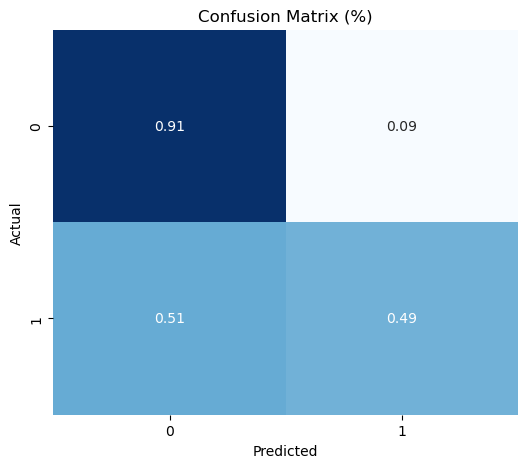

In [111]:

cm_percent = cm / cm.sum(axis=1)[:, None]  # row-wise percentage
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()


## True Positives are very low (192)
### Model is biased towards 0 , no churn
#### this was when i tried grid's scoring 'accuracy' ... now trying scorring f1

### Score = f1

In [112]:
grid2 = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'f1',
    cv = 5,
    n_jobs= -1
)

In [113]:
grid2.fit(X_train, y_train)

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [114]:
model2 = grid2.best_estimator_

In [115]:
y_pred = model2.predict(X_test)

In [116]:
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[775, 255],
       [ 89, 288]])

In [117]:
print(f'Accuracy Score of Best Logistic:{accuracy_score(y_test,y_pred)}')
print(f'Classification Report of Best Logistic:\n{classification_report(y_test,y_pred)}')

Accuracy Score of Best Logistic:0.7555081734186212
Classification Report of Best Logistic:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1030
           1       0.53      0.76      0.63       377

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



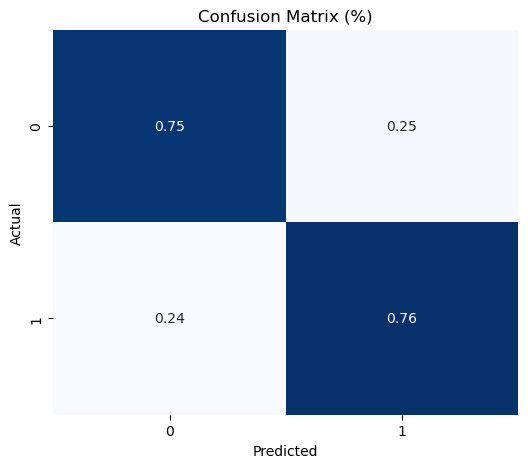

In [118]:

cm_percent = cm2 / cm2.sum(axis=1)[:, None]  # row-wise percentage
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()


## Hence got better performance using F1 as scoring aim in both Cross-validation & Parameter Tuning

### Score = Recall

In [119]:
grid3 = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'recall',
    cv = 5,
    n_jobs= -1
)

In [120]:
grid3.fit(X_train,y_train)

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [121]:
model3 = grid3.best_estimator_


In [122]:
y_pred = model3.predict(X_test)

In [126]:
acc = accuracy_score(y_test,y_pred)
acc

0.7512437810945274

In [128]:
report = classification_report(y_test,y_pred)


In [123]:
cm3 = confusion_matrix(y_test,y_pred)
cm3

array([[757, 273],
       [ 77, 300]])

In [129]:
print(f"Accuracy Score: {acc }")
print(f"Report: {report }")

Accuracy Score: 0.7512437810945274
Report:               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1030
           1       0.52      0.80      0.63       377

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.80      0.75      0.76      1407



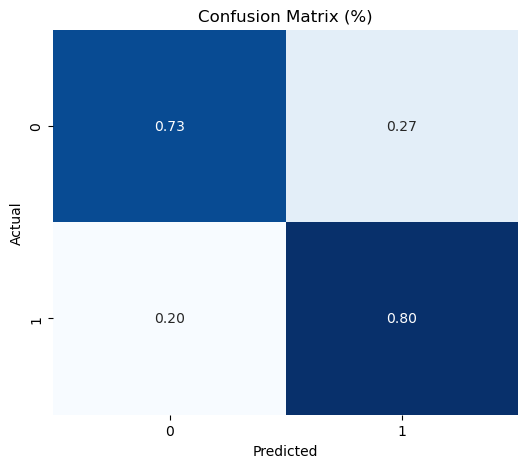

In [124]:

cm_percent = cm3 / cm3.sum(axis=1)[:, None]  # row-wise percentage
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%)')
plt.show()
